# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Sarma Elvita Malona Sianturi
- **Email:** malunambiz@gmail.com
- **ID Dicoding:** malunambiz

## Menentukan Pertanyaan Bisnis

- Bagaimana korelasi antara variabel cuaca (suhu dan situasi cuaca) terhadap jumlah total penyewaan sepeda?
- Bagaimana perbedaan pola penyewaan sepeda antara pengguna Casual dan Registered pada jam-jam operasional tertentu?

## Import Semua Packages/Library yang Digunakan

In [436]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Data Wrangling

### Gathering Data
Tahap ini adalah proses pengumpulan data yang akan digunakan untuk analisis. Dataset yang digunakan adalah **Bike Sharing Dataset** yang terdiri dari dua file utama:
1. `day.csv`: Data penyewaan sepeda yang direkap per hari.
2. `hour.csv`: Data penyewaan sepeda yang direkap per jam.

In [437]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [438]:
day_df = pd.read_csv('/content/drive/MyDrive/DICODING_DATA SCINCE/day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [439]:
hour_df = pd.read_csv('/content/drive/MyDrive/DICODING_DATA SCINCE/hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [440]:
print("Ukuran day_df: ",day_df.shape)
print("Ukuran hour_df: ",hour_df.shape)

Ukuran day_df:  (731, 16)
Ukuran hour_df:  (17379, 17)


**Insight:**
- Dataset day_df terdiri dari 731 baris dan 16 kolom, merepresentasikan data penyewaan sepeda per hari selama 2 tahun.
- Dataset hour_df terdiri dari 17.379 baris dan 17 kolom, memberikan detail penyewaan per jam.
- Kedua dataset memiliki kolom waktu yang sama, yaitu dteday, yang memungkinkan penggabungan *(join)* data.
- Dataset hour_df memiliki kolom tambahan hr sebagai informasi waktu pada tingkat jam.

### Assessing Data

In [441]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [442]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [443]:
day_df.isnull().sum().sum()

np.int64(0)

In [444]:
day_df.duplicated().sum()

np.int64(0)

In [445]:
# Cek Outlier
outlier_summary = {}

columns_to_check = ['temp', 'atemp', 'hum', 'windspeed']

for col in columns_to_check:
    q25 = day_df[col].quantile(0.25)
    q75 = day_df[col].quantile(0.75)
    iqr = q75 - q25

    minimum = q25 - 1.5 * iqr
    maximum = q75 + 1.5 * iqr

    outliers = day_df[(day_df[col] < minimum) | (day_df[col] > maximum)]
    outlier_summary[col] = outliers.shape[0]

for col, count in outlier_summary.items():
    print(f"{col}: {count} outlier")

temp: 0 outlier
atemp: 0 outlier
hum: 2 outlier
windspeed: 13 outlier


In [446]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [447]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [448]:
hour_df.isnull().sum().sum()

np.int64(0)

In [449]:
hour_df.duplicated().sum()

np.int64(0)

In [450]:
# Cek Outlier
outlier_summary = {}

columns_to_check = ['temp', 'atemp', 'hum', 'windspeed']

for col in columns_to_check:
    q25 = hour_df[col].quantile(0.25)
    q75 = hour_df[col].quantile(0.75)
    iqr = q75 - q25

    minimum = q25 - 1.5 * iqr
    maximum = q75 + 1.5 * iqr

    outliers = hour_df[(hour_df[col] < minimum) | (hour_df[col] > maximum)]
    outlier_summary[col] = outliers.shape[0]

for col, count in outlier_summary.items():
    print(f"{col}: {count} outlier")

temp: 0 outlier
atemp: 0 outlier
hum: 22 outlier
windspeed: 342 outlier


**Insight:**
- **Missing Value:** Tidak ditemukan *missing value* pada kedua dataset (`day_df` dan `hour_df`).
- **Duplicate Data:** Tidak ditemukan data duplikat pada kedua dataset.
- **Inaccurate Value (Tipe Data):** Terdapat ketidaksesuaian tipe data pada kolom `dteday`. Kolom ini seharusnya diubah menjadi tipe `datetime` agar bisa diolah sebagai data deret waktu *(time series)*.
- **Outlier Analysis**: Berdasarkan metode IQR pada variabel kontinu:
    * **Temp & Atemp**: Tidak ditemukan *outlier*, distribusi data suhu normal.
    * **Humidity**: Ditemukan sejumlah outlier, khususnya pada nilai ekstrem rendah (mendekati 0).
    * **Windspeed**: Ditemukan cukup banyak outlier pada batas atas.

### Cleaning Data

In [451]:
# Memperbaiki tipe data
datetime_columns = ["dteday"]
for column in datetime_columns:
  day_df[column] = pd.to_datetime(day_df[column])
  hour_df[column] = pd.to_datetime(hour_df[column])

In [452]:
# Mengganti nama kolom
day_df.rename(columns={'dteday': 'dateday', 'yr': 'year', 'mnth': 'month', 'weathersit': 'weather_cond', 'cnt': 'count'}, inplace = True)
hour_df.rename(columns={'dteday': 'dateday', 'yr': 'year', 'mnth': 'month', 'hr': 'hour', 'weathersit': 'weather_cond', 'cnt': 'count'}, inplace = True)

In [453]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   instant       731 non-null    int64         
 1   dateday       731 non-null    datetime64[ns]
 2   season        731 non-null    int64         
 3   year          731 non-null    int64         
 4   month         731 non-null    int64         
 5   holiday       731 non-null    int64         
 6   weekday       731 non-null    int64         
 7   workingday    731 non-null    int64         
 8   weather_cond  731 non-null    int64         
 9   temp          731 non-null    float64       
 10  atemp         731 non-null    float64       
 11  hum           731 non-null    float64       
 12  windspeed     731 non-null    float64       
 13  casual        731 non-null    int64         
 14  registered    731 non-null    int64         
 15  count         731 non-null    int64     

In [454]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   instant       17379 non-null  int64         
 1   dateday       17379 non-null  datetime64[ns]
 2   season        17379 non-null  int64         
 3   year          17379 non-null  int64         
 4   month         17379 non-null  int64         
 5   hour          17379 non-null  int64         
 6   holiday       17379 non-null  int64         
 7   weekday       17379 non-null  int64         
 8   workingday    17379 non-null  int64         
 9   weather_cond  17379 non-null  int64         
 10  temp          17379 non-null  float64       
 11  atemp         17379 non-null  float64       
 12  hum           17379 non-null  float64       
 13  windspeed     17379 non-null  float64       
 14  casual        17379 non-null  int64         
 15  registered    17379 non-null  int64 

In [455]:
# Menangani inaccurate value pada kolom 'hum'
day_df['hum'] = day_df['hum'].replace(0, np.nan)
hour_df['hum'] = hour_df['hum'].replace(0, np.nan)

day_df['hum'] = day_df['hum'].fillna(day_df['hum'].mean())
hour_df['hum'] = hour_df['hum'].fillna(hour_df['hum'].mean())

In [456]:
print("Min Humidity (seharusnya > 0):", day_df['hum'].min())
print("Min Humidity (seharusnya > 0):", hour_df['hum'].min())

Min Humidity (seharusnya > 0): 0.187917
Min Humidity (seharusnya > 0): 0.08


In [457]:
# Kolom untuk visualisasi
season_map = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
weather_map = {
    1: 'Clear / Partly Cloudy',
    2: 'Misty / Cloudy',
    3: 'Light Rain / Snow',
    4: 'Severe Weather'}

day_df['season_label'] = day_df['season'].map(season_map)
day_df['weather_label'] = day_df['weather_cond'].map(weather_map)

hour_df['season_label'] = hour_df['season'].map(season_map)
hour_df['weather_label'] = hour_df['weather_cond'].map(weather_map)

In [458]:
day_df[['dateday', 'weather_label', 'season_label']].head()

,dateday,weather_label,season_label
0,2011-01-01,Misty / Cloudy,Spring
1,2011-01-02,Misty / Cloudy,Spring
2,2011-01-03,Clear / Partly Cloudy,Spring
3,2011-01-04,Clear / Partly Cloudy,Spring
4,2011-01-05,Clear / Partly Cloudy,Spring


In [459]:
hour_df[['dateday', 'weather_label', 'season_label']].head()

,dateday,weather_label,season_label
0,2011-01-01,Clear / Partly Cloudy,Spring
1,2011-01-01,Clear / Partly Cloudy,Spring
2,2011-01-01,Clear / Partly Cloudy,Spring
3,2011-01-01,Clear / Partly Cloudy,Spring
4,2011-01-01,Clear / Partly Cloudy,Spring


**Insight:**
- **Perbaikan Tipe Data:** Kolom `dteday`berhasil diubah menjadi tipe `datetime` sehingga bisa diolah sebagai data deret waktu *(time series)*.
- **Perbaikan Nama Kolom:** Kolom-kolom dengan nama singkatan (`yr`, `mnth`, `cnt`, dll.) telah diubah menjadi nama yang lebih deskriptif (`year`, `month`, `count`)
- **Handling Inaccurate Value:** Nilai humidity = 0 yang tidak valid telah ditangani dengan *mean imputation*.
- **Penambahan Label Kategorikal:** Kolom `season_label` dan `weather_label` ditambahkan pada dataset harian (`day_df`) untuk meningkatkan keterbacaan dan konsistensi visualisasi.

## Exploratory Data Analysis (EDA)

### Explore Data `day_df`

In [460]:
day_df.describe(include="all")

,instant,dateday,season,year,month,holiday,weekday,workingday,weather_cond,temp,atemp,hum,windspeed,casual,registered,count,season_label,weather_label
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731,731
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fall,Clear / Partly Cloudy
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,188,463
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.628754,0.190486,848.176471,3656.172367,4504.348837,NaN,NaN
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.187917,0.022392,2.000000,20.000000,22.000000,NaN,NaN
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.521041,0.134950,315.500000,2497.000000,3152.000000,NaN,NaN
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.627500,0.180975,713.000000,3662.000000,4548.000000,NaN,NaN
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000,NaN,NaN
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000,NaN,NaN


In [461]:
# Korelasi
day_df[['temp', 'atemp', 'hum', 'windspeed', 'count']].corr()

,temp,atemp,hum,windspeed,count
temp,1.000000,0.991702,0.125131,-0.157944,0.627494
atemp,0.991702,1.000000,0.138556,-0.183643,0.631066
hum,0.125131,0.138556,1.000000,-0.246223,-0.114309
windspeed,-0.157944,-0.183643,-0.246223,1.000000,-0.234545
count,0.627494,0.631066,-0.114309,-0.234545,1.000000


In [462]:
# Penyewaan berdasarkan Musim (Season)
day_df.groupby(by="season_label").agg({
    "count" : ["mean", "max", "min", "std"]
})

count                         
                     mean   max   min          std
season_label                                      
Fall          5644.303191  8714  1115  1459.800381
Spring        2604.132597  7836   431  1399.942119
Summer        4992.331522  8362   795  1695.977235
Winter        4728.162921  8555    22  1699.615261

In [463]:
# Penyewaan berdasarkan Cuaca (Weather Condition)
day_df.groupby(by="weather_label").agg({
    "count" : ["mean", "max", "min", "std"]
})

count                        
                              mean   max  min          std
weather_label                                             
Clear / Partly Cloudy  4876.786177  8714  431  1879.483989
Light Rain / Snow      1803.285714  4639   22  1240.284449
Misty / Cloudy         4035.862348  8362  605  1809.109918

### Explore Data `hour_df`

In [464]:
hour_df.describe(include="all")

,instant,dateday,season,year,month,hour,holiday,weekday,workingday,weather_cond,temp,atemp,hum,windspeed,casual,registered,count,season_label,weather_label
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379,17379
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,4
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fall,Clear / Partly Cloudy
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4496,11413
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.628024,0.190098,35.676218,153.786869,189.463088,NaN,NaN
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.080000,0.000000,0.000000,0.000000,1.000000,NaN,NaN
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000,NaN,NaN
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000,NaN,NaN
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000,NaN,NaN
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000,NaN,NaN


In [465]:
# Penyewaan berdasarkan Cuaca (Weather Condition)
hour_df.groupby(by="weather_label").agg({
    "count" : ["mean", "max", "min", "std"]
})

count                     
                             mean  max min         std
weather_label                                         
Clear / Partly Cloudy  204.869272  977   1  189.487773
Light Rain / Snow      111.579281  891   1  133.781045
Misty / Cloudy         175.165493  957   1  165.431589
Severe Weather          74.333333  164  23   77.925178

In [466]:
# Penyewaan berdasarkan Cuaca (Weather Condition)
hour_df.groupby(by="season_label").agg({
    "count" : ["mean", "max", "min", "std"]
})

count                     
                    mean  max min         std
season_label                                 
Fall          236.016237  977   1  197.711630
Spring        111.114569  801   1  119.224010
Summer        208.344069  957   1  188.362473
Winter        198.868856  967   1  182.967972

In [467]:
# Pola Penyewaan Berdasarkan Jam
workingday_df = hour_df.groupby("hour").agg({
    "casual": "mean",
    "registered": "mean",
    "count":"mean"
}).reset_index()

workingday_df

,hour,casual,registered,count
0,0,10.158402,43.739669,53.898072
1,1,6.504144,26.871547,33.375691
2,2,4.772028,18.097902,22.869930
3,3,2.715925,9.011478,11.727403
4,4,1.253945,5.098996,6.352941
5,5,1.411437,18.478382,19.889819
6,6,4.161379,71.882759,76.044138
7,7,11.055021,201.009629,212.064649
8,8,21.679505,337.331499,359.011004
9,9,30.891334,188.418157,219.309491


In [468]:
# Top 5 Jam dengan Jumlah Penyewaan Sepeda Tertinggi
workingday_df.sort_values(by="count", ascending=False).head()

,hour,casual,registered,count
17,17,74.273973,387.178082,461.452055
18,18,61.120879,364.390110,425.510989
8,8,21.679505,337.331499,359.011004
16,16,73.745205,238.238356,311.983562
19,19,48.770604,262.752747,311.523352


In [469]:
# Perbandingan Pengguna Casual dan Registered
hour_df[["casual", "registered"]].describe()

,casual,registered
count,17379.000000,17379.000000
mean,35.676218,153.786869
std,49.305030,151.357286
min,0.000000,0.000000
25%,4.000000,34.000000
50%,17.000000,115.000000
75%,48.000000,220.000000
max,367.000000,886.000000


In [470]:
# Penyewaan Berdasarkan Hari Kerja
hour_df.groupby(by="workingday").agg({
    "casual": "mean",
    "registered":"mean",
    "count":"mean"
})

,casual,registered,count
workingday,,,
0,57.441422,123.963910,181.405332
1,25.561315,167.646439,193.207754


**Insight:**

- **Faktor Lingkungan & Cuaca**
1. Suhu (`temp`, `atemp`) berkorelasi positif dengan jumlah penyewaan.
2. Kelembapan (`hum`) dan kecepatan angin (`windspeed`) berkorelasi negatif lemah.
3. Cuaca cerah (`Clear`/`Partly Cloudy`) menghasilkan penyewaan tertinggi; hujan ringan/salju menurunkan permintaan >50%.

- **Pola Musiman *(Seasonality)***
1. Penyewaan tertinggi terjadi pada musim `Fall` (~5.644 sewa/hari).
2. Penyewaan terendah terjadi pada musim `Spring` (~2.604 sewa/hari)

- **Pola Penyewaan Berdasarkan Jam *(Hourly Trend)***
1. Lonjakan terjadi pada jam komuter (08.00 dan 17.00–18.00).
2. Puncak penyewaan tertinggi pada pukul 17.00.
3. Penyewaan terendah pada dini hari (00.00–05.00).

- **Perilaku Pengguna *(User Segmentation)***
1. `Registered user` mendominasi total penyewaan dan menjadi kontributor utama.
2. `Registered user` aktif pada hari kerja dan jam sibuk.
3. `Casual user` meningkat pada akhir pekan.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

In [471]:
Bagaimana korelasi antara variabel cuaca (suhu dan situasi cuaca) terhadap jumlah total penyewaan sepeda?

Object `sepeda` not found.


In [472]:
# Hitung Korelasi
day_df[['temp', 'atemp', 'hum', 'windspeed', 'count']].corr()['count']

,count
temp,0.627494
atemp,0.631066
hum,-0.114309
windspeed,-0.234545
count,1.000000


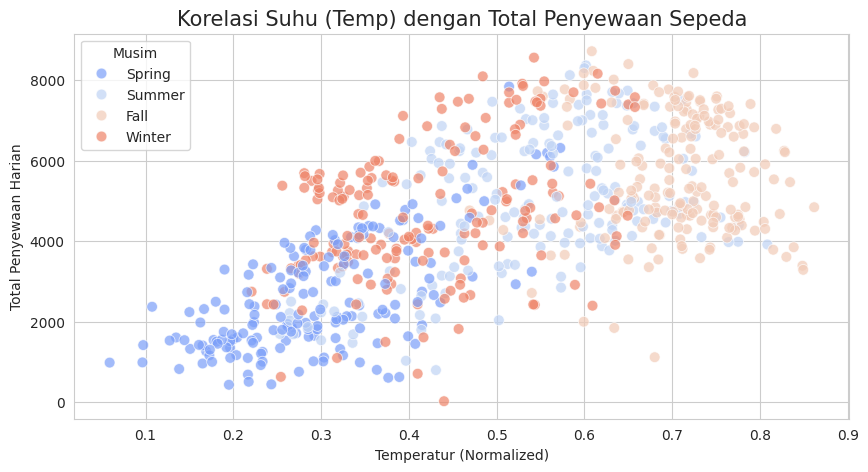

In [473]:
fig, ax = plt.subplots(figsize=(10,5))

sns.scatterplot(
    x='temp',
    y='count',
    data=day_df,
    hue='season_label',
    palette='coolwarm',
    s=60,
    alpha=0.7,
    ax=ax
)

ax.set_title('Korelasi Suhu (Temp) dengan Total Penyewaan Sepeda', fontsize=15)
ax.set_xlabel('Temperatur (Normalized)')
ax.set_ylabel('Total Penyewaan Harian')
ax.legend(title='Musim')
plt.show()

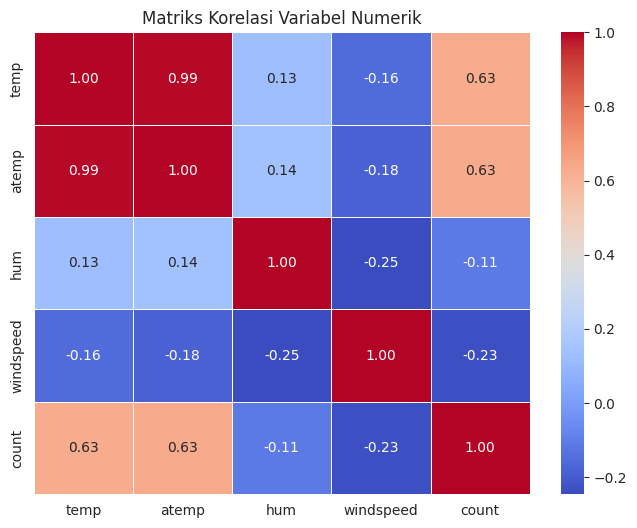

In [474]:
plt.figure(figsize=(8, 6))
# Matriks Korelasi Variabel Numerik
correlation_matrix = day_df[['temp', 'atemp', 'hum', 'windspeed', 'count']].corr()

sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    linewidths=0.5
)
plt.title('Matriks Korelasi Variabel Numerik')
plt.show()

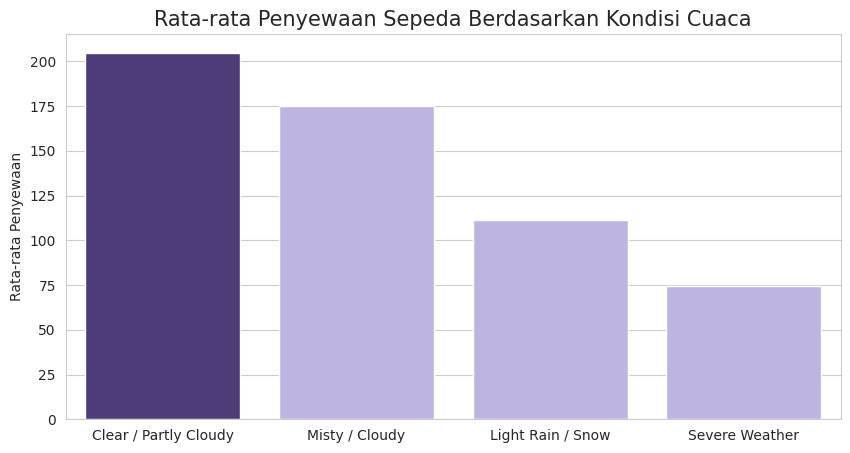

In [475]:
# Rata-rata Penyewaan Berdasarkan Kondisi Cuaca
weather_rental_df = hour_df.groupby(by="weather_label").agg({
    "count": "mean"
    }).reset_index()

weather_rental_df = weather_rental_df.sort_values("count", ascending=False)
max_value = weather_rental_df["count"].max()

# Coloring
colors = [
    "#4A3283" if val == max_value else "#B9ACEA"
    for val in weather_rental_df["count"]
]

# Visualisasi Rata-rata Penyewaan Berdasarkan Kondisi Cuaca
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(10,5))

sns.barplot(
    x="weather_label",
    y="count",
    data=weather_rental_df,
    hue="weather_label",
    palette=colors,
    ax=ax
)

ax.set_title("Rata-rata Penyewaan Sepeda Berdasarkan Kondisi Cuaca", loc="center", fontsize=15)
ax.set_xlabel(None)
ax.set_ylabel("Rata-rata Penyewaan")

plt.show()

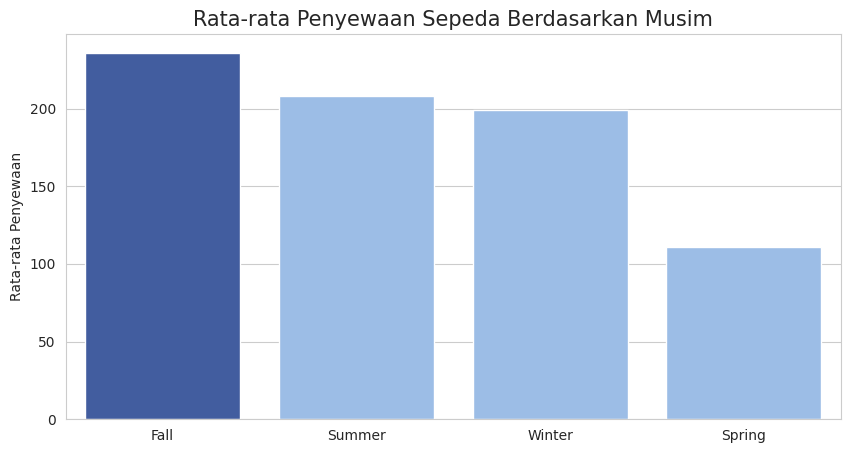

In [476]:
# Rata-rata Penyewaan Berdasarkan Musim
season_rental_df = hour_df.groupby(by="season_label").agg({
    "count": "mean"
}).reset_index()
season_rental_df = season_rental_df.sort_values("count", ascending=False)
max_value = season_rental_df["count"].max()

# Coloring
colors = [
    "#3257AE" if val == max_value else "#8FBCF3"
    for val in season_rental_df["count"]
]

# Visualisasi Rata-rata Penyewaan Berdasarkan Musim
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(10,5))

sns.barplot(
    x="season_label",
    y="count",
    data=season_rental_df,
    hue="season_label",
    palette=colors,
    ax=ax
)

ax.set_title("Rata-rata Penyewaan Sepeda Berdasarkan Musim", loc="center", fontsize=15)
ax.set_xlabel(None)
ax.set_ylabel("Rata-rata Penyewaan")

plt.show()

### Pertanyaan 2:

In [477]:
Bagaimana perbedaan pola penyewaan sepeda antara pengguna Casual dan Registered pada jam-jam operasional tertentu?

Object `tertentu` not found.


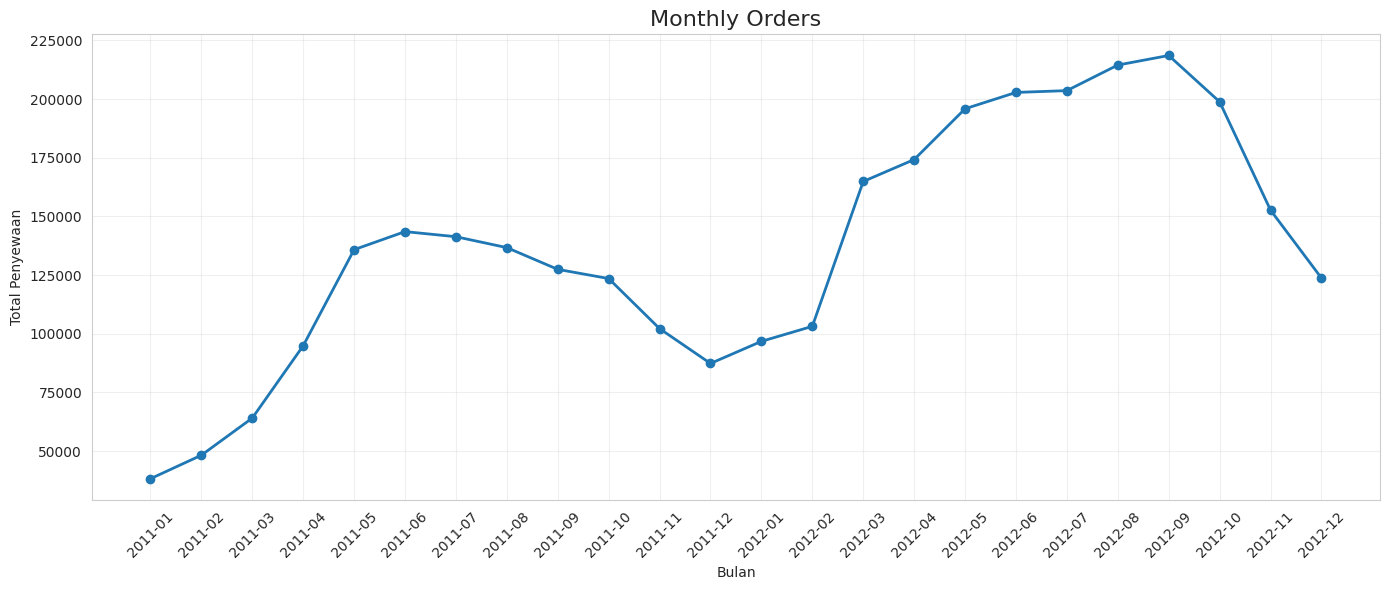

In [478]:
# Monthly Orders
monthly_orders_df = (
    hour_df.groupby(pd.Grouper(key="dateday", freq="ME"))["count"].sum().reset_index()
    )

monthly_orders_df["month"] = monthly_orders_df["dateday"].dt.strftime("%Y-%m")

# Plot
plt.figure(figsize=(14, 6))

plt.plot(
    monthly_orders_df["month"],
    monthly_orders_df["count"],
    marker='o',
    linewidth=2
)

plt.title("Monthly Orders", fontsize=16)
plt.xlabel("Bulan")
plt.ylabel("Total Penyewaan")

plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


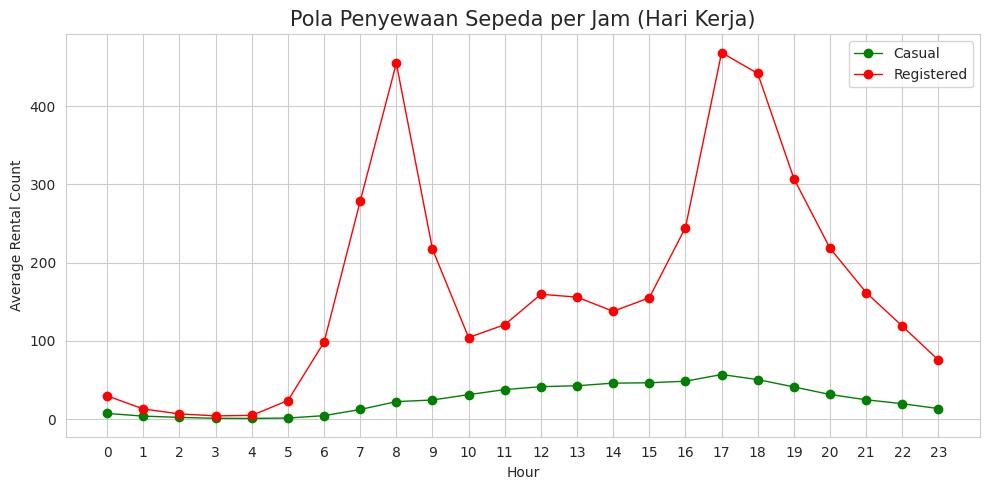

In [479]:
# workingday = 1 artinya hari kerja
workday_hourly = hour_df[hour_df['workingday'] == 1]

workday_hourly = workday_hourly.groupby(by="hour").agg({
    'casual' : 'mean',
    'registered' : 'mean',
    'count': 'mean'
    })
workday_hourly = workday_hourly.reset_index()

# Visualisasi Pola Penyewaan Sepeda per Jam (Hari Kerja)
fig, ax = plt.subplots(figsize=(10,5))

ax.plot(
    workday_hourly["hour"],
    workday_hourly["casual"],
    marker='o',
    linewidth=1,
    label="Casual",
    color='green'
)

ax.plot(
    workday_hourly["hour"],
    workday_hourly["registered"],
    color='red',
    marker='o',
    linewidth=1,
    label="Registered",
)

ax.set_title("Pola Penyewaan Sepeda per Jam (Hari Kerja)",
             loc="center", fontsize=15)
ax.set_xlabel("Hour")
ax.set_ylabel("Average Rental Count")
ax.set_xticks(range(0,24))
ax.legend()
ax.grid(True)

plt.tight_layout()
plt.show()

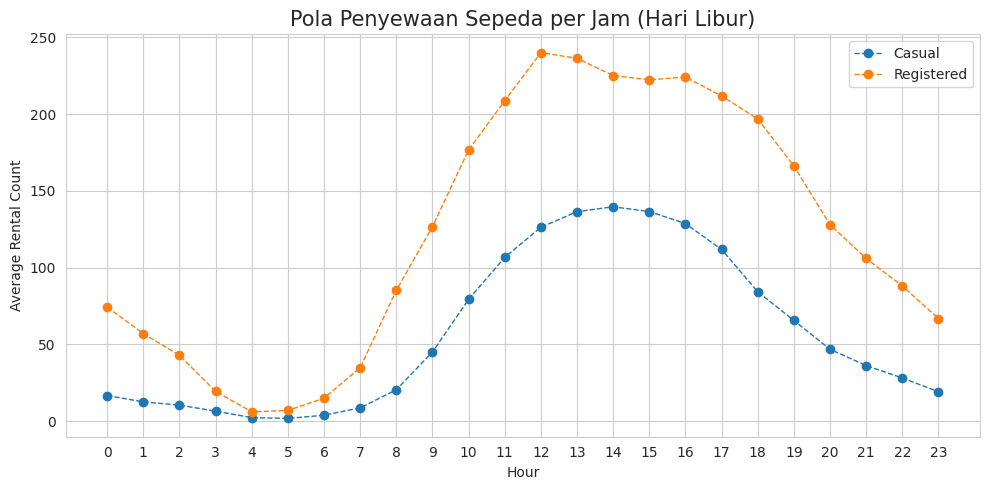

In [480]:
# workingday = 0 artinya bukan hari kerja
holiday_df = hour_df[hour_df['workingday'] == 0]

holiday_hourly = holiday_df.groupby(by="hour").agg({
    'casual' : 'mean',
    'registered' : 'mean',
    'count': 'mean'
    })
holiday_hourly = holiday_hourly.reset_index()

# Visualisasi Pola Penyewaan Sepeda per Jam (Hari Libur)
fig, ax = plt.subplots(figsize=(10,5))

ax.plot(
    holiday_hourly["hour"],
    holiday_hourly["casual"],
    marker='o',
    linestyle='--',
    linewidth=1,
    label="Casual",
)

ax.plot(
    holiday_hourly["hour"],
    holiday_hourly["registered"],
    marker='o',
    linestyle='--',
    linewidth=1,
    label="Registered",
)

ax.set_title('Pola Penyewaan Sepeda per Jam (Hari Libur)',
             loc='center', fontsize=15)
ax.set_xlabel("Hour")
ax.set_ylabel("Average Rental Count")
ax.set_xticks(range(0,24))
ax.legend()
ax.grid(True)

plt.tight_layout()
plt.show()

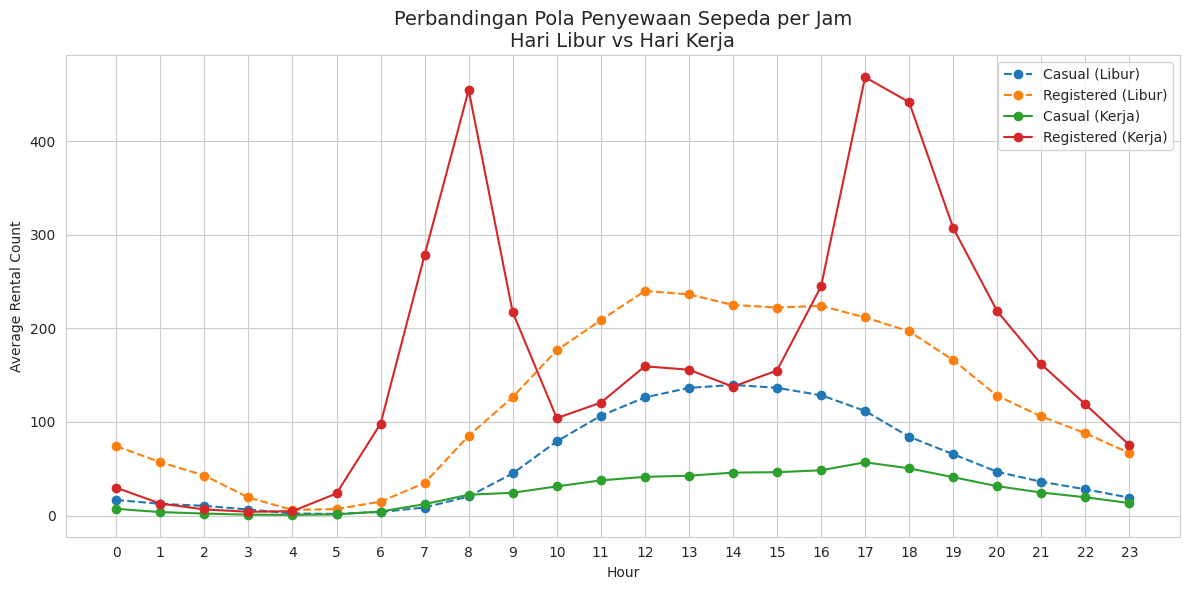

In [481]:
# Agregasi data
holiday_hourly = (
    hour_df[hour_df['workingday'] == 0].groupby(by="hour")[["casual", "registered"]].mean().reset_index()
)

workday_hourly = (
    hour_df[hour_df['workingday'] == 1].groupby("hour")[["casual", "registered"]].mean().reset_index()
)

# Visualisasi gabungan
fig, ax = plt.subplots(figsize=(12,6))

# Hari Libur
ax.plot(
    holiday_hourly["hour"],
    holiday_hourly["casual"],
    marker='o',
    linestyle='--',
    label="Casual (Libur)")

ax.plot(
    holiday_hourly["hour"],
    holiday_hourly["registered"],
    marker='o',
    linestyle='--',
    label="Registered (Libur)")

# Hari Kerja
ax.plot(
    workday_hourly["hour"],
    workday_hourly["casual"],
    marker='o',
    linestyle='-',
    label="Casual (Kerja)")

ax.plot(
    workday_hourly["hour"],
    workday_hourly["registered"],
    marker='o',
    linestyle='-',
    label="Registered (Kerja)")

ax.set_title("Perbandingan Pola Penyewaan Sepeda per Jam\nHari Libur vs Hari Kerja",
             loc='center', fontsize=14)
ax.set_xlabel("Hour")
ax.set_ylabel("Average Rental Count")
ax.set_xticks(range(0,24))
ax.legend()
ax.grid(True)

plt.tight_layout()
plt.show()

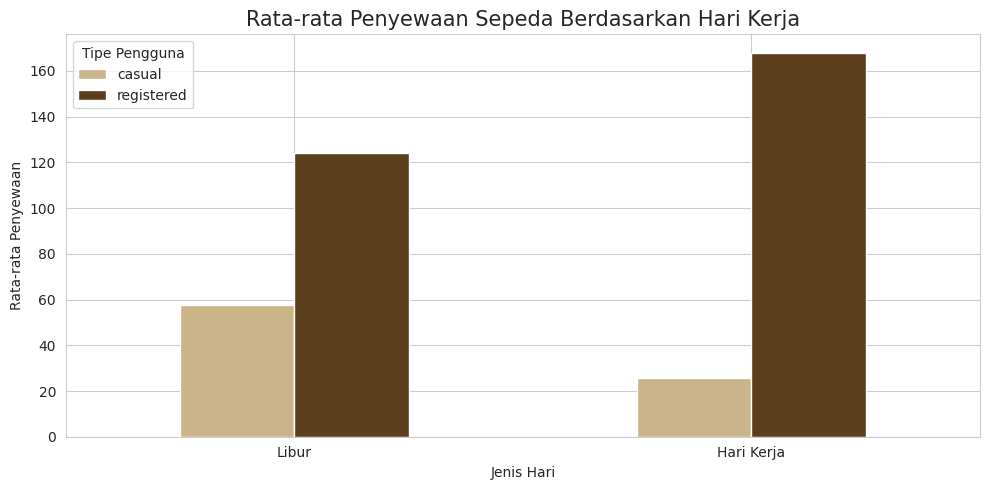

In [482]:
# Pola Penyewaan Berdasarkan Hari Kerja
workingday_df = hour_df.groupby("workingday").agg({
    "casual": "mean",
    "registered": "mean"
}).reset_index()

fig, ax = plt.subplots(figsize=(10,5))

workingday_df.set_index("workingday").plot(
    kind="bar",
    ax=ax,
    color=["#CBB38A", "#5B3E1C"]
)

ax.set_title("Rata-rata Penyewaan Sepeda Berdasarkan Hari Kerja", fontsize=15)
ax.set_xlabel("Jenis Hari")
ax.set_ylabel("Rata-rata Penyewaan")
ax.set_xticklabels(["Libur", "Hari Kerja"], rotation=0)
ax.legend(title="Tipe Pengguna")

plt.tight_layout()
plt.show()


**Insight:**
- **Perbedaan Pola Jam: Casual vs Registered sangat kontras**
1. `Registered` memiliki dua puncak jelas, yaitu pagi (±07–09) dan sore (±16–18)
2. `Casual` memiliki pola yang lebih landai. Puncak terjadi siang–sore (±12–16)

Makna: Registered → pengguna rutin & fungsional

- **Hari Kerja vs Hari Libur → bukti kuat aktivitas kerja**
1. `Hari Kerja` : Penyewaan didominasi pengguna registered dengan puncak tajam pada pagi dan sore hari, sementara casual relatif rendah dan stabil.
2. `Hari Libur` : Pola registered melemah, casual meningkat di siang hari, dan tidak terdapat puncak jam komuter.

Makna strategis: Pola jam registered didorong oleh aktivitas kerja.

- **Casual vs Registered berdasarkan Hari Kerja**
1. `Hari Kerja`: Registered jauh lebih tinggi dibanding casual
2. `Hari Libur`: Casual meningkat signifikan dan jarak dengan registered mengecil

Makna: Casual lebih sensitif terhadap waktu luang, Registered lebih terikat rutinitas harian.

- **Faktor Lingkungan (Pendukung Insight)**
1. `Cuaca cerah` menghasilkan jumlah sewa tertinggi
2. `Suhu (temp/atemp)` berkorelasi positif kuat dengan total sewa
3. `Kelembapan & angin` berkorelasi negatif lemah–sedang

Makna: Lingkungan memengaruhi volume, tapi pola jam ditentukan oleh tipe pengguna.

## Analisis Lanjutan (Opsional)

In [483]:
# Manual Clustering Berdasarkan Jam Operasional (Time-based Binning)
def time_category(hour) :
  if 0 <= hour < 5:
    return "Early Morning"
  elif 5 <= hour < 11:
    return "Morning"
  elif 11 <= hour < 15:
    return "Afternoon"
  elif 15<= hour < 19:
    return "Evening"
  else:
    return "Night"

hour_df["time_category"] = hour_df["hour"].apply(time_category)

In [484]:
# Manual Clustering Berdasarkan Suhu (Temperature-Based Binning)
def temp_category(temp):
  if temp < 0.3:
    return "Cool/Cold"
  elif 0.3 <= temp < 0.6:
    return "Moderate/Normal"
  else:
    return "Warm/Hot"

hour_df["temp_category"] = hour_df["temp"].apply(temp_category)

In [485]:
hour_df["temp_category"]

,temp_category
0,Cool/Cold
1,Cool/Cold
2,Cool/Cold
3,Cool/Cold
4,Cool/Cold
...,...
17374,Cool/Cold
17375,Cool/Cold
17376,Cool/Cold
17377,Cool/Cold


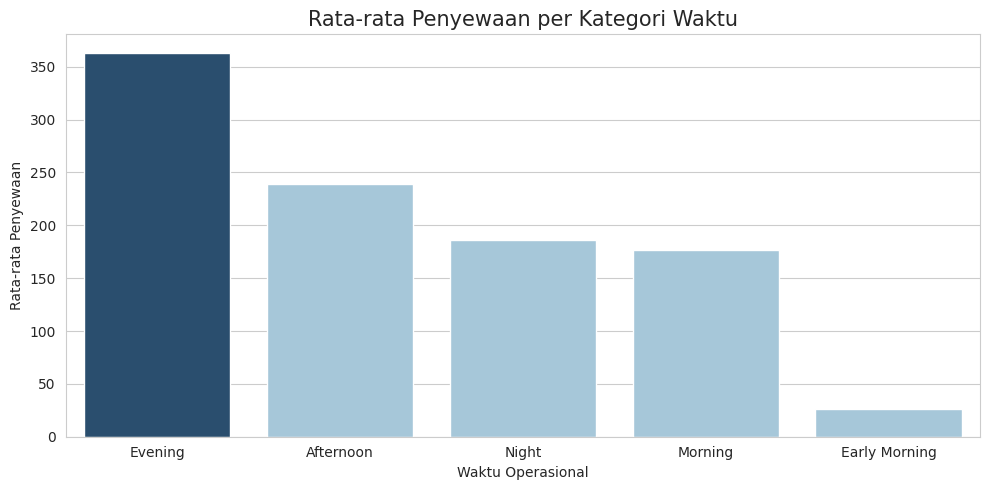

In [486]:
time_mean = hour_df.groupby("time_category", as_index=False)["count"].mean()

time_mean = time_mean.sort_values("count", ascending=False)
max_category = time_mean.iloc[0]["time_category"]

# Coloring
palette = {
    cat: "#1f4e79" if cat == max_category else "#9ecae1"
    for cat in order
    }

# Plot
fig, ax = plt.subplots(figsize=(10,5))

sns.barplot(
    data=time_mean,
    x="time_category",
    y="count",
    hue="time_category",
    order=time_mean["time_category"],
    palette=palette,
    ax=ax
)

ax.set_title("Rata-rata Penyewaan per Kategori Waktu", fontsize=15)
ax.set_xlabel("Waktu Operasional")
ax.set_ylabel("Rata-rata Penyewaan")

plt.tight_layout()
plt.show()

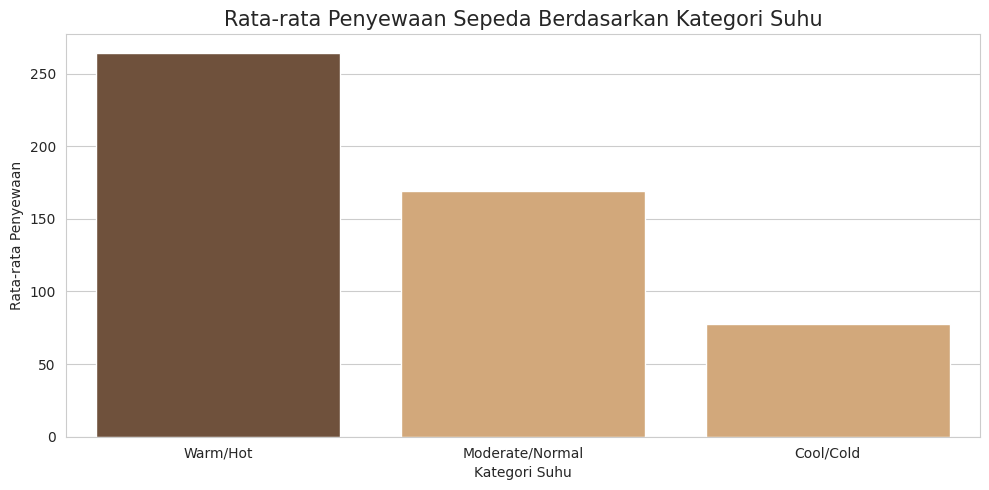

In [487]:
temp_mean = hour_df.groupby("temp_category", as_index=False)["count"].mean()

temp_mean = temp_mean.sort_values("count", ascending=False)
max_category = temp_mean.iloc[0]["temp_category"]

# Coloring
palette = {
    cat: "#784F33" if cat == max_category else "#E0A96D"
    for cat in temp_mean["temp_category"]
}

# Plot
fig, ax = plt.subplots(figsize=(10,5))

sns.barplot(
    data=temp_mean,
    x="temp_category",
    y="count",
    hue="temp_category",
    order=temp_mean["temp_category"],  # ← ini kuncinya
    palette=palette,
    ax=ax
)

ax.set_title("Rata-rata Penyewaan Sepeda Berdasarkan Kategori Suhu", fontsize=15)
ax.set_xlabel("Kategori Suhu")
ax.set_ylabel("Rata-rata Penyewaan")

plt.tight_layout()
plt.show()

## Conclusion

## Conclution pertanyaan 1

**1. Bagaimana korelasi antara variabel cuaca (suhu dan situasi cuaca) terhadap jumlah total penyewaan sepeda?**
   - **Hubungan Positif Kuat:** Terdapat korelasi positif yang signifikan antara suhu (`temp` dan `atemp`) dengan jumlah penyewaan. Semakin hangat suhu, semakin tinggi minat masyarakat untuk menyewa sepeda.
   - **Sensitivitas Cuaca:** Kondisi cuaca sangat krusial, rata-rata penyewaan tertinggi tercatat pada cuaca cerah (*Clear/Partly Cloudy*). Sebaliknya, kondisi hujan ringan atau salju menurunkan permintaan secara drastis (>50%).

## Conclution pertanyaan 2
**2. Bagaimana perbedaan pola penyewaan sepeda antara pengguna Casual dan Registered pada jam-jam operasional tertentu?**
   - **Registered User:** Sangat aktif pada hari kerja dengan puncak aktivitas pada jam berangkat (**08.00**) dan pulang kerja (**17.00–18.00**).
   - **Casual User:** Lebih aktif pada hari libur dan siang hari (**12.00–16.00**), dengan pola kurva yang lebih landai tanpa lonjakan tajam.

In [488]:
day_df.to_csv("day_clean.csv", index=False)
hour_df.to_csv("hour_clean.csv", index=False)

from google.colab import files

files.download("day_clean.csv")
files.download("hour_clean.csv")
print("File day_clean.csv dan hour_clean.csv berhasil disimpan.")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

File day_clean.csv dan hour_clean.csv berhasil disimpan.
